In [15]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
sns.set_context('notebook')

In [2]:
fsamples = list(Path('1pct_samples').glob('*.zst'))
plots_dir = Path('plots')

df = pd.concat([pd.read_json(f, lines=True) for f in fsamples], ignore_index=True )
df['htmllang'] = df.htmllang.str[0]
print(len(df), 'examples')

df.lhat.value_counts()

df['1-p0'] = 1-df.prob.str[0]
log_p1 = (df.prob.str[1]).apply(np.log)
# instead of -inf, for the score use the value smaller than the smallest finite score
log_p1 = log_p1.replace(-np.inf, np.log(df.query('prob.str[1]>0.0').prob.str[1].min() / 2)) 
df['log(p1)-log(p0)'] = log_p1 - df.prob.str[0].apply(np.log)
df.lhat.value_counts()

292856 examples


lhat
cmn_Hans    11613
jpn_Jpan    11369
deu_Latn    11243
fra_Latn    11137
spa_Latn    11051
bul_Cyrl    10967
rus_Cyrl    10909
swe_Latn    10888
cat_Latn    10721
ukr_Cyrl    10714
fin_Latn    10623
ces_Latn    10570
hun_Latn    10491
dan_Latn    10488
nld_Latn    10442
lvs_Latn    10296
eng_Latn    10279
bho_Deva    10115
ast_Latn    10047
mlt_Latn     9958
glg_Latn     9920
azb_Arab     8919
prs_Arab     8614
nno_Latn     8533
afr_Latn     8522
bel_Cyrl     8259
crh_Latn     8255
ban_Latn     7613
bak_Cyrl     6098
acq_Arab     4202
Name: count, dtype: int64

In [3]:
print('Proportions of most frequent values:',df.htmllang.value_counts(dropna=False, normalize=True).head(30))

Proportions of most frequent values: htmllang
NaN      0.317395
en       0.091455
en-US    0.045288
es       0.039436
ja       0.031227
ru       0.026839
de       0.023059
ca       0.020532
fr       0.019515
cs       0.019204
fi       0.018767
fa-IR    0.017698
hu       0.017643
uk       0.016455
be       0.016039
nl       0.015899
fa       0.013891
de-DE    0.013512
bg       0.012720
fr-FR    0.012276
ru-RU    0.011316
sv       0.009882
lv       0.009175
da       0.008516
tr       0.008250
es-ES    0.007970
hi       0.007837
bg-BG    0.007744
ar       0.007601
sv-SE    0.007570
Name: proportion, dtype: float64


In [4]:
df.htmllang = df.htmllang.str.split('-').str[0].str.split('_').str[0] # for en-US or en_US take only en
df.htmllang = df.htmllang.str.lower()
df.htmllang = df.htmllang.fillna('null')

In [5]:
print('Proportions of most frequent values:',df.htmllang.value_counts(dropna=False, normalize=True).head(30))

Proportions of most frequent values: htmllang
null    0.317398
en      0.149534
es      0.053511
ru      0.041276
de      0.039644
fr      0.033928
fa      0.033252
ja      0.032251
cs      0.023544
ca      0.022714
bg      0.021806
nl      0.021430
hu      0.020700
fi      0.020351
uk      0.019139
sv      0.018122
be      0.017879
da      0.014273
lv      0.011845
tr      0.011343
hi      0.009015
ar      0.008250
zh      0.007587
af      0.007468
gl      0.005409
azb     0.003541
pt      0.003165
it      0.003100
bho     0.003097
ua      0.002271
Name: proportion, dtype: float64


In [6]:
gs = pd.read_csv('group_sizes.tsv', sep='\t', header=None, names='docs lhat'.split())
gs.lhat = gs.lhat.fillna('null')
gs['docs_rank'] = gs.docs.rank(ascending=False)

df = df.merge(gs, how='left', on='lhat').sort_values(by='docs', ascending=False)
df['lhat+rank'] = df.lhat + ' #' + df.docs_rank.astype(int).astype(str)

# Score distributions

In [19]:
# fscore = '1-p0'
fscore = 'log(p1)-log(p0)'


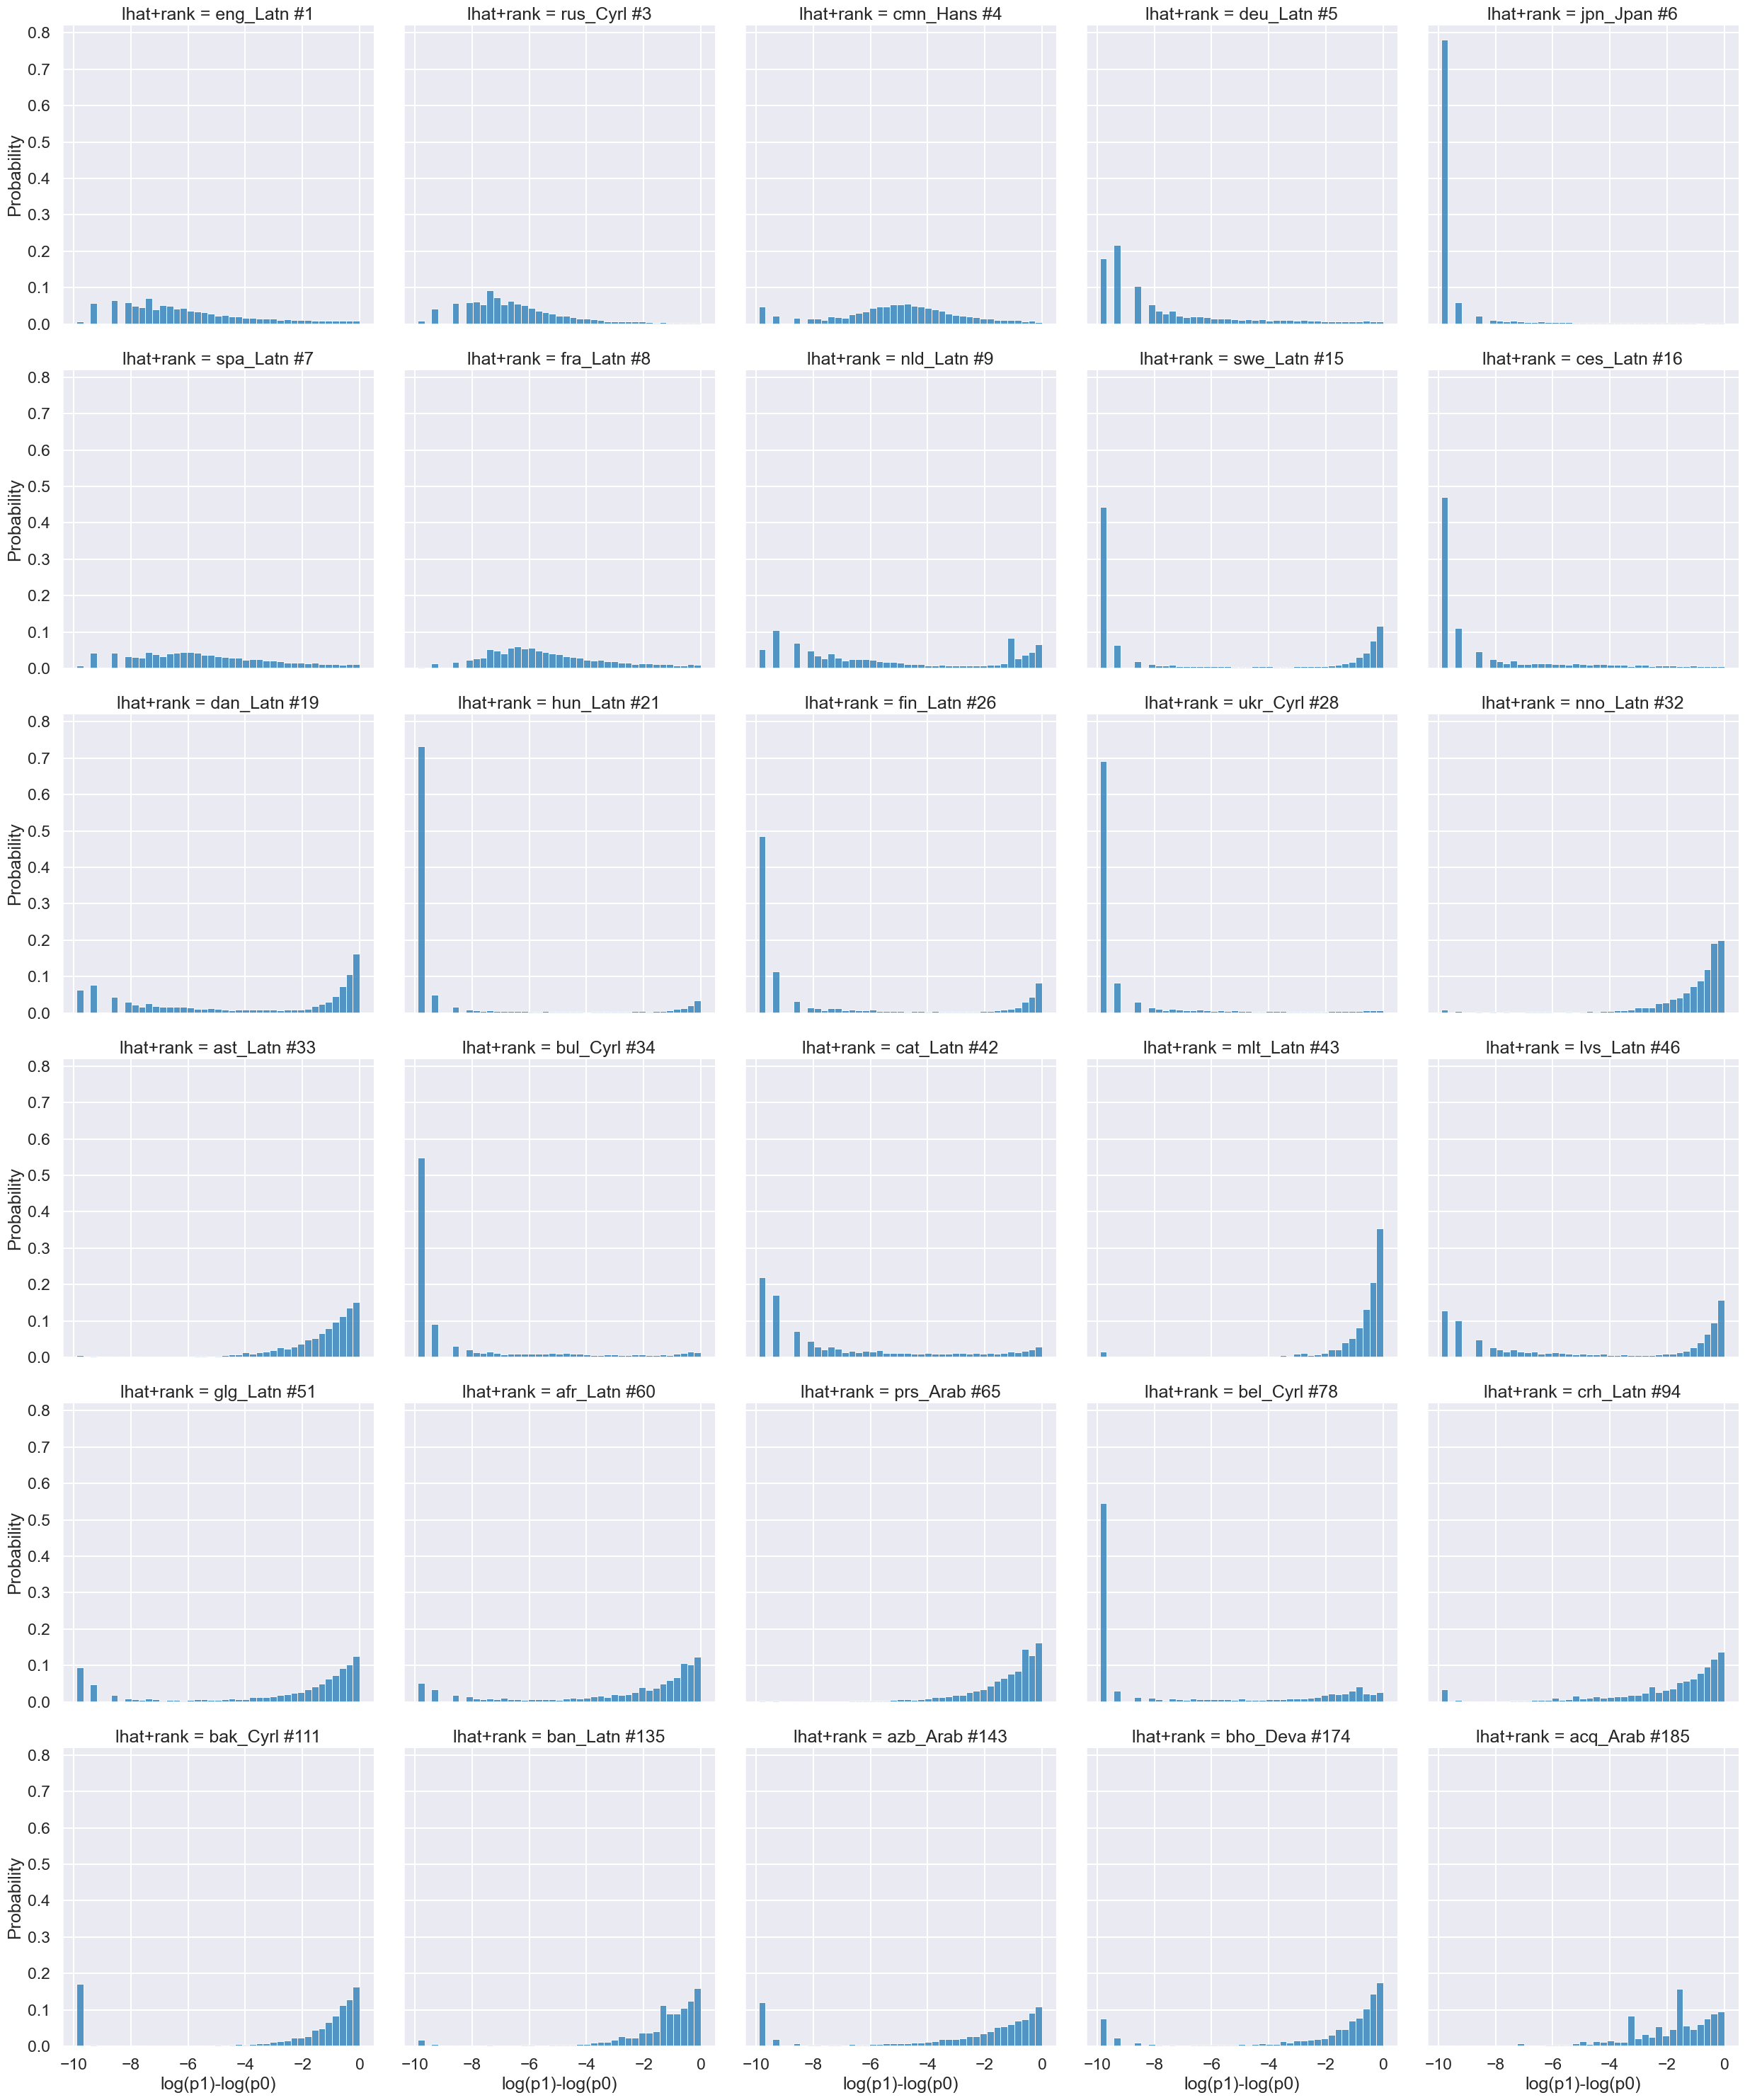

In [20]:
with sns.plotting_context('talk'):
    g = sns.displot(df, x=fscore, cumulative=False, stat='probability', common_norm=False, col='lhat+rank', col_wrap=5)
    g.savefig(plots_dir/f'{fscore}_hist.pdf')

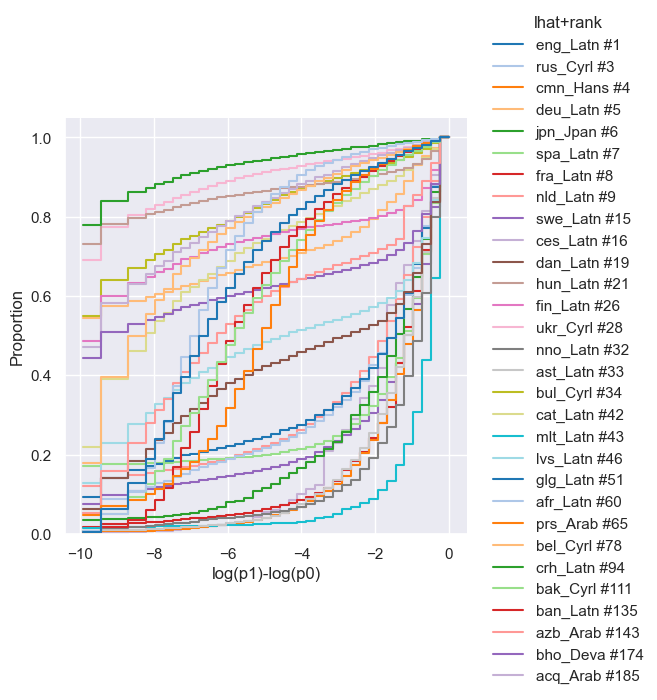

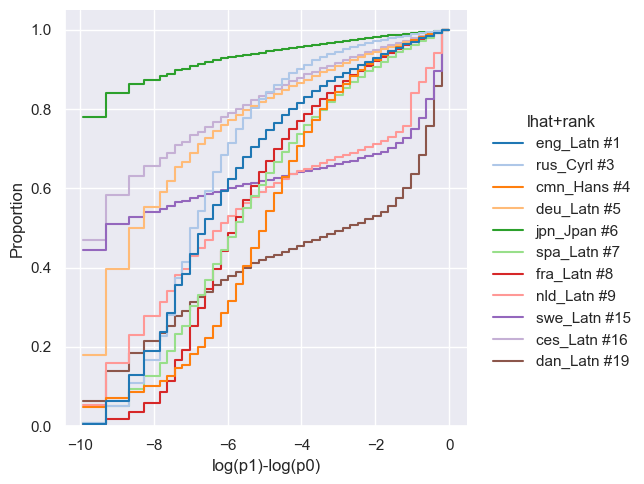

In [21]:
g = sns.displot(df, x=fscore, cumulative=True, stat='proportion', common_norm=False, element='step', fill=False, hue='lhat+rank',
              palette='tab20')
g.savefig(plots_dir/f'{fscore}_cumhist.pdf')
g = sns.displot(df[df.docs_rank<20], x=fscore, cumulative=True, stat='proportion', common_norm=False, element='step', fill=False, hue='lhat+rank',
          palette='tab20')
g.savefig(plots_dir/f'{fscore}_cumhist_top20.pdf')

# HTML lang proportions

In [22]:
l2hl = df.groupby('lhat').htmllang.agg(lambda s: s.value_counts(dropna=False, normalize=True).reset_index().query('proportion>0.01')).to_dict()
l2hl

{'acq_Arab': array([['ar', 0.49119466920514043],
        ['null', 0.418848167539267],
        ['en', 0.044026653974297954],
        ['fa', 0.018086625416468348],
        ['ja', 0.013564969062351261]], dtype=object),
 'afr_Latn': array([['en', 0.29922553391222717],
        ['null', 0.27622623797230694],
        ['af', 0.2553391222717672],
        ['nl', 0.060431823515606664],
        ['de', 0.03989673785496362],
        ['fr', 0.018070875381365877]], dtype=object),
 'ast_Latn': array([['es', 0.33980292624664077],
        ['null', 0.31073952423609036],
        ['en', 0.20513586145117946],
        ['fr', 0.0265750970438937],
        ['pt', 0.017517666965263263],
        ['ca', 0.01692047377326565],
        ['ja', 0.01224246043595103],
        ['de', 0.012142928237284762]], dtype=object),
 'azb_Arab': array([['fa', 0.47886534364839106],
        ['null', 0.332212131404866],
        ['azb', 0.11626863998206077],
        ['en', 0.03699966363942146],
        ['ar', 0.01255746159883395]], dtype

In [23]:
l2hl = df.groupby('lhat').htmllang.agg(lambda s: s.value_counts(normalize=True).reset_index().query('proportion>0.01').htmllang).to_dict()
l2hl

{'acq_Arab': array(['ar', 'null', 'en', 'fa', 'ja'], dtype=object),
 'afr_Latn': array(['en', 'null', 'af', 'nl', 'de', 'fr'], dtype=object),
 'ast_Latn': array(['es', 'null', 'en', 'fr', 'pt', 'ca', 'ja', 'de'], dtype=object),
 'azb_Arab': array(['fa', 'null', 'azb', 'en', 'ar'], dtype=object),
 'bak_Cyrl': array(['ru', 'null', 'ba', 'en', 'os'], dtype=object),
 'ban_Latn': array(['en', 'null', 'de', 'fr', 'ban', 'id', 'es', 'ja'], dtype=object),
 'bel_Cyrl': array(['be', 'null', 'ru', 'en', 'by'], dtype=object),
 'bho_Deva': array(['en', 'null', 'hi', 'bho'], dtype=object),
 'bul_Cyrl': array(['bg', 'null', 'en', 'ru'], dtype=object),
 'cat_Latn': array(['ca', 'null', 'es', 'en'], dtype=object),
 'ces_Latn': array(['cs', 'null', 'en', 'cz'], dtype=object),
 'cmn_Hans': array(['null', 'zh', 'en'], dtype=object),
 'crh_Latn': array(['tr', 'null', 'en', 'crh', 'de'], dtype=object),
 'dan_Latn': array(['da', 'null', 'en', 'de', 'fr', 'no'], dtype=object),
 'deu_Latn': array(['de', 'null'

In [24]:
df['htmllang_grouped'] = df.apply(lambda r: r.htmllang if r.htmllang in l2hl[r.lhat] else 'OTHER', axis=1)

In [25]:
# g = sns.displot(df, x=fscore, cumulative=True, stat='count', common_norm=True, element='step', fill=False, 
#                 hue='htmllang_grouped', col='lhat', col_wrap=4)
# g.savefig(plots_dir/f'{fscore}_pr.pdf')

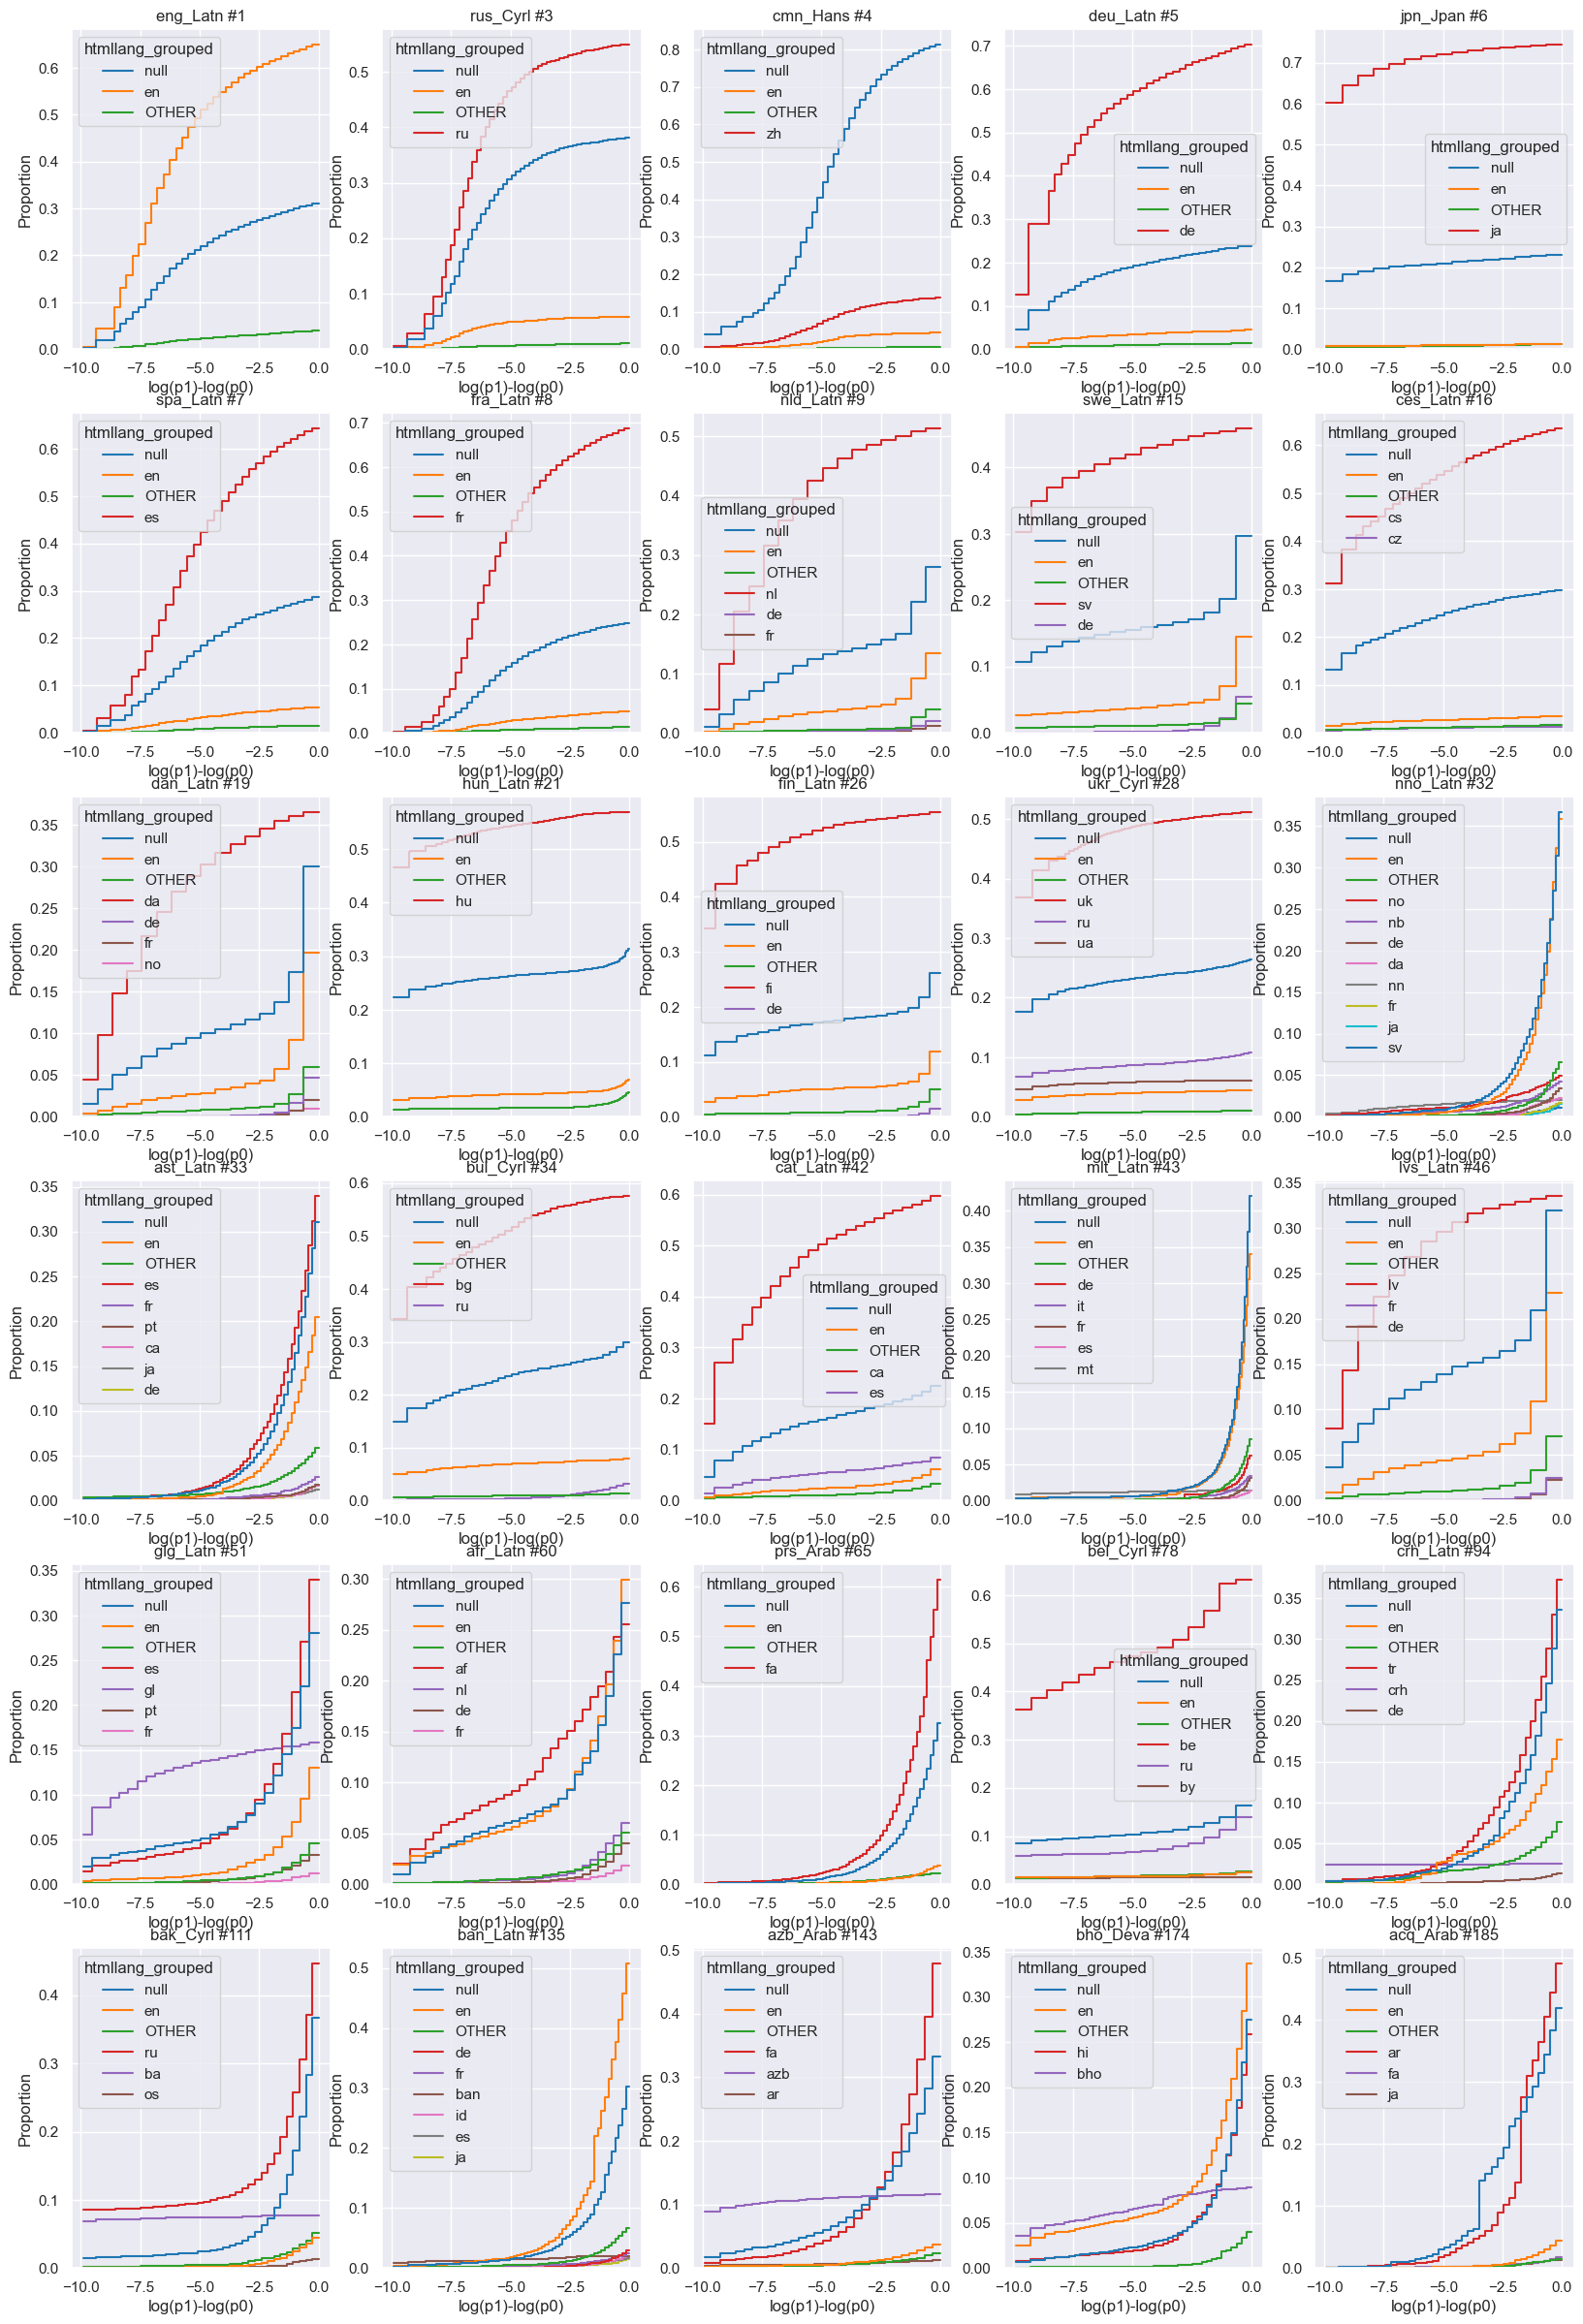

In [26]:
fig, axes = plt.subplots(6, 5, figsize=(20,30))
for l,ax in zip(df['lhat+rank'].unique(), axes.flatten()):
    htmllang_order = ['null','en', 'OTHER']
    df1 = df[df['lhat+rank']==l]
    htmllang_order += [l for l in df1.htmllang_grouped.value_counts().index if l not in htmllang_order]
    g = sns.histplot(df1, x=fscore, cumulative=True, stat='proportion', common_norm=True, element='step', fill=False, 
                    hue='htmllang_grouped',  hue_order=htmllang_order, palette='tab10', ax=ax)
    ax.set_title(l)
fig.savefig(plots_dir/f'{fscore}_htmllangs_props_cum.pdf')

# Precision-recall curves

In [95]:
print(len(df), 'examples')
df.dropna(subset='htmllang', inplace=True)
df.drop(df[df.htmllang.str.lower()=='null'].index, inplace=True)
print(len(df), 'after dropping null htmllang')

df.drop(df[df.htmllang.str.lower().isin('en en-us en-gb'.split())].index, inplace=True)
print(len(df), 'after dropping htmllang containg "en"')

206978 examples
139632 after dropping null htmllang
110488 after dropping htmllang containg "en"


In [96]:
df.groupby('lhat').htmllang.apply(lambda s: s.value_counts().index[0]).to_dict()

{'ast_Latn': 'es',
 'bak_Cyrl': 'ru',
 'bul_Cyrl': 'bg',
 'cat_Latn': 'ca',
 'ces_Latn': 'cs',
 'cmn_Hans': 'zh',
 'dan_Latn': 'da',
 'deu_Latn': 'de',
 'eng_Latn': 'es',
 'fin_Latn': 'fi',
 'fra_Latn': 'fr',
 'glg_Latn': 'es',
 'jpn_Jpan': 'ja',
 'lvs_Latn': 'lv',
 'mlt_Latn': 'de',
 'nld_Latn': 'nl',
 'nno_Latn': 'no',
 'rus_Cyrl': 'ru',
 'spa_Latn': 'es',
 'ukr_Cyrl': 'uk'}

In [97]:
lang2htmllang = {
# 'ast_Latn': 'es',  # no specific htmllang?
 'bak_Cyrl': 'ba',
 'bul_Cyrl': 'bg',
 'cat_Latn': 'ca',
 'ces_Latn': 'cs cz',
    'cmn_Hans': 'zh cn cmn',
 'dan_Latn': 'da',
 'deu_Latn': 'de',
 'fin_Latn': 'fi',
 'fra_Latn': 'fr',
 'glg_Latn': 'gl',
    'jpn_Jpan': 'ja jp',
 'lvs_Latn': 'lv',
 'mlt_Latn': 'mt',
    'nld_Latn': 'nl',
 'nno_Latn': 'no nn',
 'rus_Cyrl': 'ru rus',
    'spa_Latn': 'es',
 'ukr_Cyrl': 'uk ukr ua'
}

lang2htmllang = {k: v.split() for k,v in lang2htmllang.items()}
print(lang2htmllang['ces_Latn'])


['cs', 'cz']


In [98]:
print(len(df), 'before dropping langs without aligned htmlland')
df.drop(df[~df.lhat.isin(lang2htmllang.keys())].index, inplace=True)
print(len(df), 'after')


110488 before dropping langs without aligned htmlland
105215 after


In [99]:
df['weak_label'] = df.apply(lambda r: r.htmllang in lang2htmllang.get(r.lhat), axis=1)

In [100]:
df.groupby(['lhat','weak_label']).htmllang.agg(lambda s: ','.join(f'{k}:{v}' for k,v in s.value_counts().to_dict().items())).reset_index()

,lhat,weak_label,htmllang
0,bak_Cyrl,False,"ru:2724,os:79,sah:33,cv:27,ab:21,ce:18,bg:16,u..."
1,bak_Cyrl,True,ba:468
2,bul_Cyrl,False,"ru:352,:80,uk:11,de:7,mk:6,he:4,cs:3,nl:3,/bg:..."
3,bul_Cyrl,True,bg:6317
4,cat_Latn,False,"es:900,fr:107,pt:37,va:37,de:21,:19,cat:18,ja:..."
5,cat_Latn,True,ca:6405
6,ces_Latn,False,"sk:92,:27,de:13,pl:11,fr:5,ja:4,ru:3,ces:2,cz2..."
7,ces_Latn,True,"cs:6718,cz:142"
8,cmn_Hans,False,"ja:17,gb2312:16,utf:10,:4,ko:3,zxx:2,gbk:2,ch:..."
9,cmn_Hans,True,"zh:1586,cn:17,cmn:3"


In [101]:
df['p0'] = 1 - df['1-p0']
df['log(p0)-log(p1)'] = -df['log(p1)-log(p0)']

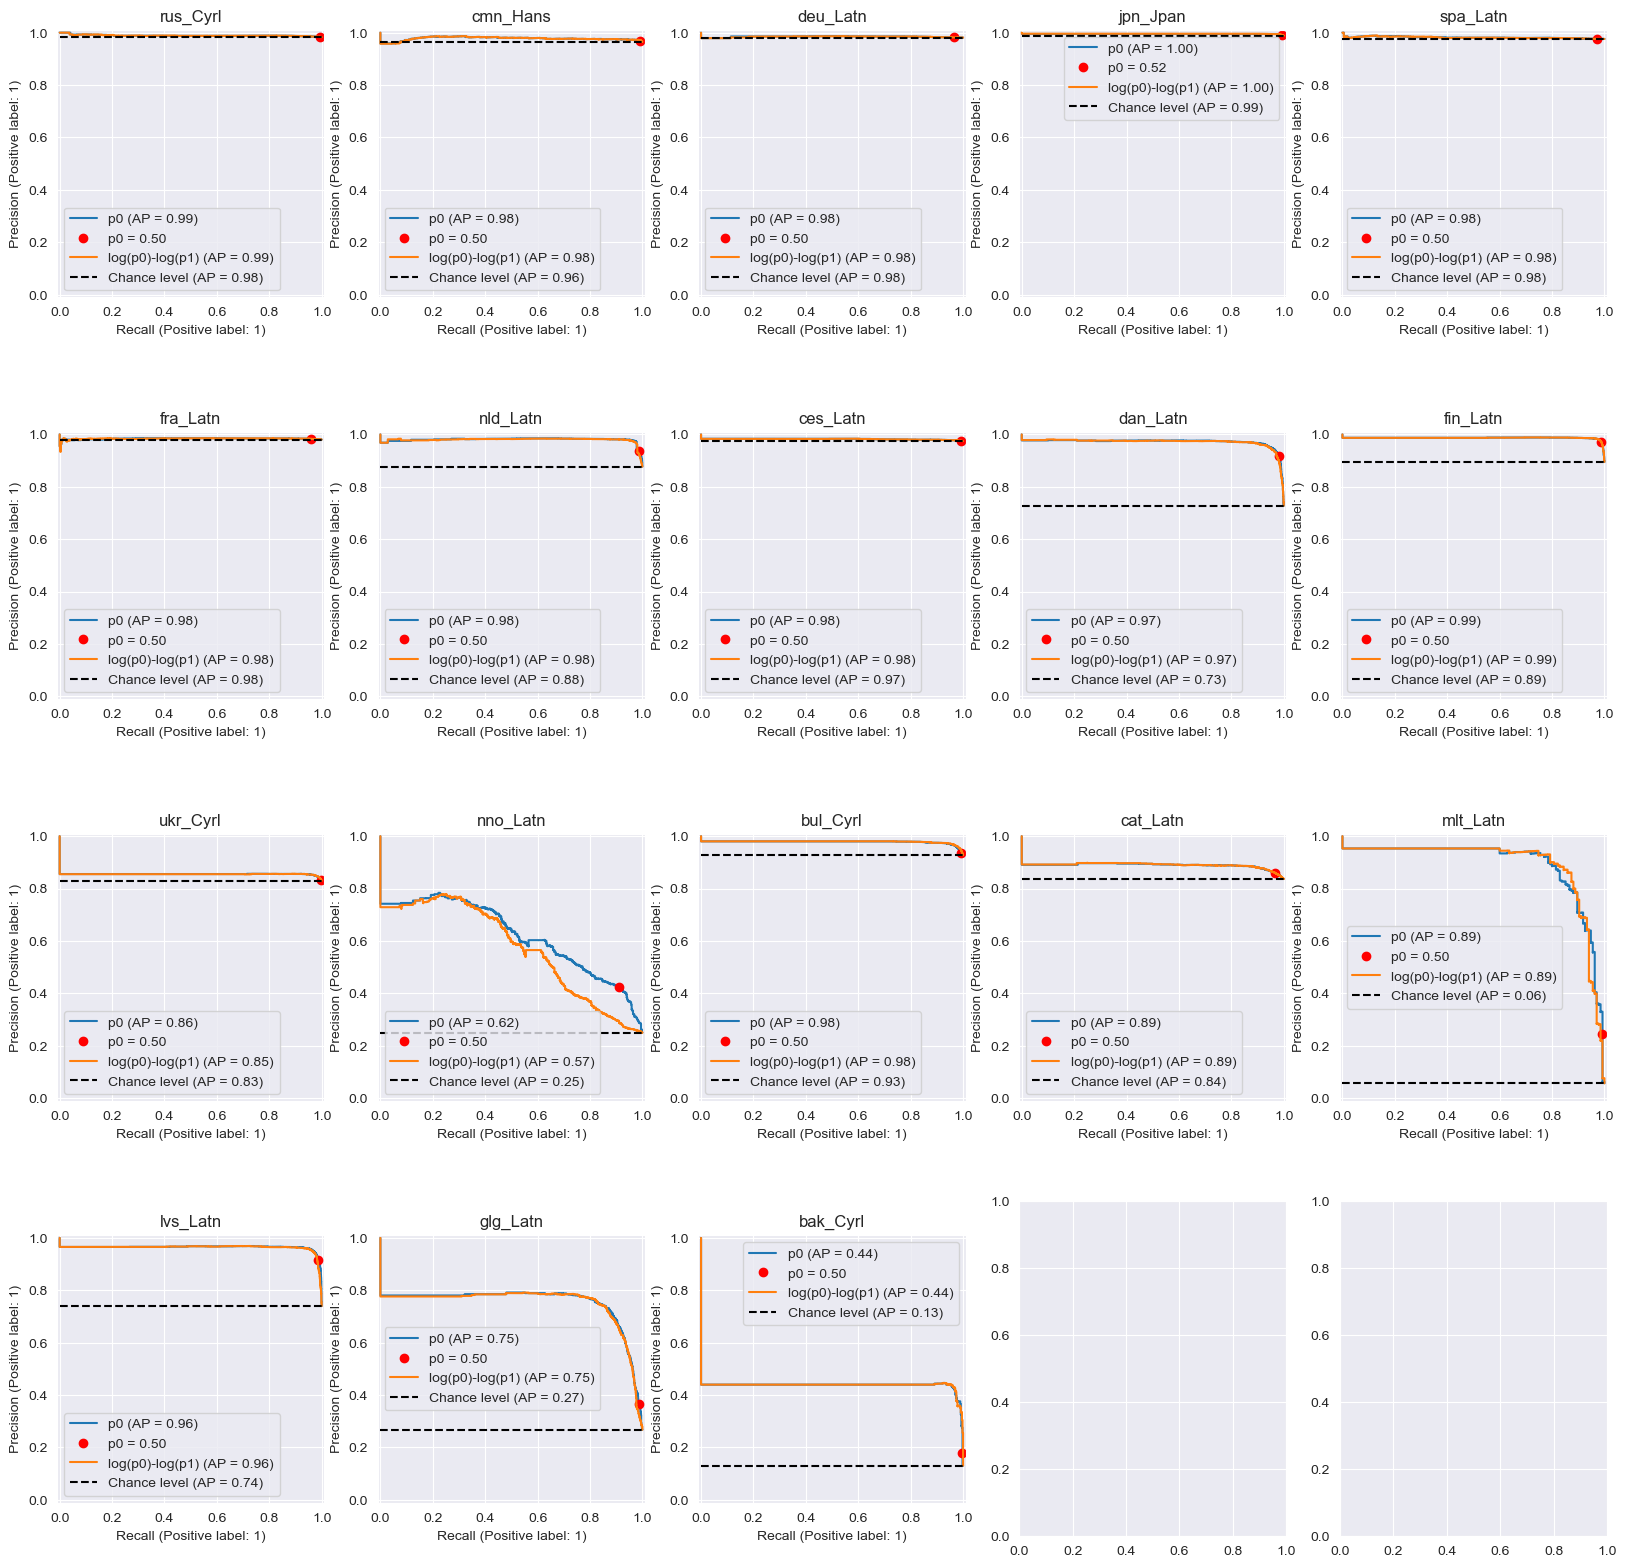

In [109]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, average_precision_score

fig, axes = plt.subplots(4, 5, figsize=(20,20))
for l,ax in zip(df.lhat.unique(), axes.flatten()):
    ldf = df[df.lhat==l]
    y_true = ldf['weak_label']
    pos_label = True

    fscores = ('p0', 'log(p0)-log(p1)')
    for fscore in fscores:
        y_pred = ldf[fscore]

        precision, recall, thresholds = precision_recall_curve(y_true, y_pred, pos_label=pos_label)
        average_precision = average_precision_score(y_true, y_pred, pos_label=pos_label)
        display = PrecisionRecallDisplay.from_predictions(y_true, y_pred, name=fscore, plot_chance_level=(fscore==fscores[-1]), ax=ax)

        assert (np.argsort(thresholds)==np.arange(len(thresholds))).all(), 'the array of thresholds not sorted, the following will not work'
        i = np.searchsorted(thresholds, 0.5)
        if fscore=='p0':
            ax.plot(recall[i], precision[i], "ro", label=f"{fscore} = {thresholds[i]:.2f}")
    ax.set_title(l)
    ax.legend()

fig.savefig(plots_dir/f'pr.pdf')

